<font size="8" color ="#00416a" face="Times new roman" > Exploratory Data Analysis</font>


<font size="5.5" color ="#ed2939" face="Times new roman" > Student Performance Indicator</font>

## 1. Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


## 2. Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.


## 3. Dataset Information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's     degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\price\OneDrive\Desktop\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# shape of dataset
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum() 

0

In [7]:
df.nunique() ## unique values in different features

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
## description of a dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insights

1. Mean score of the students is between 66 to 69.
2. All the standard deviations are also near to each other - between 14.60 - 15.20
3. Some students have scored 100 in maths but some also have scored 0 marks in maths.

In [9]:
numerical_features = [features for features in df.columns if (df[features].dtype!='O')]
categorical_features = [features for features in df.columns if (df[features].dtype=='O')]

In [10]:
print(numerical_features)
print(categorical_features)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [11]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<Axes: >

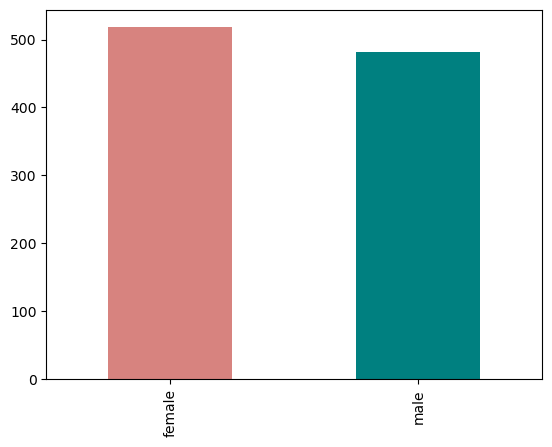

In [12]:
df['gender'].value_counts().plot(kind='bar',color=['#d7837f','#008080'])

In [13]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

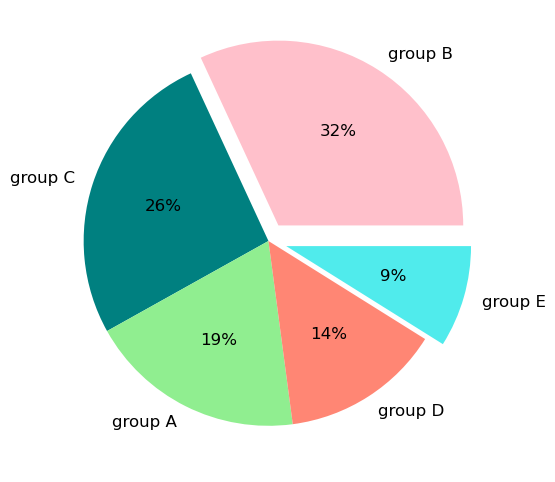

In [14]:
plt.figure(figsize=(12,6))
explode = [0.1, 0, 0, 0, 0.1]
c=['pink', '#008080', 'lightgreen', '#FF8674', '#50EBEC']
plt.pie(df['race/ethnicity'].value_counts(),explode=explode,labels=df['race/ethnicity'].unique(),
        autopct='%.0f%%',colors=c,textprops ={"fontsize":12});

Most of the students belongs to group B and group C

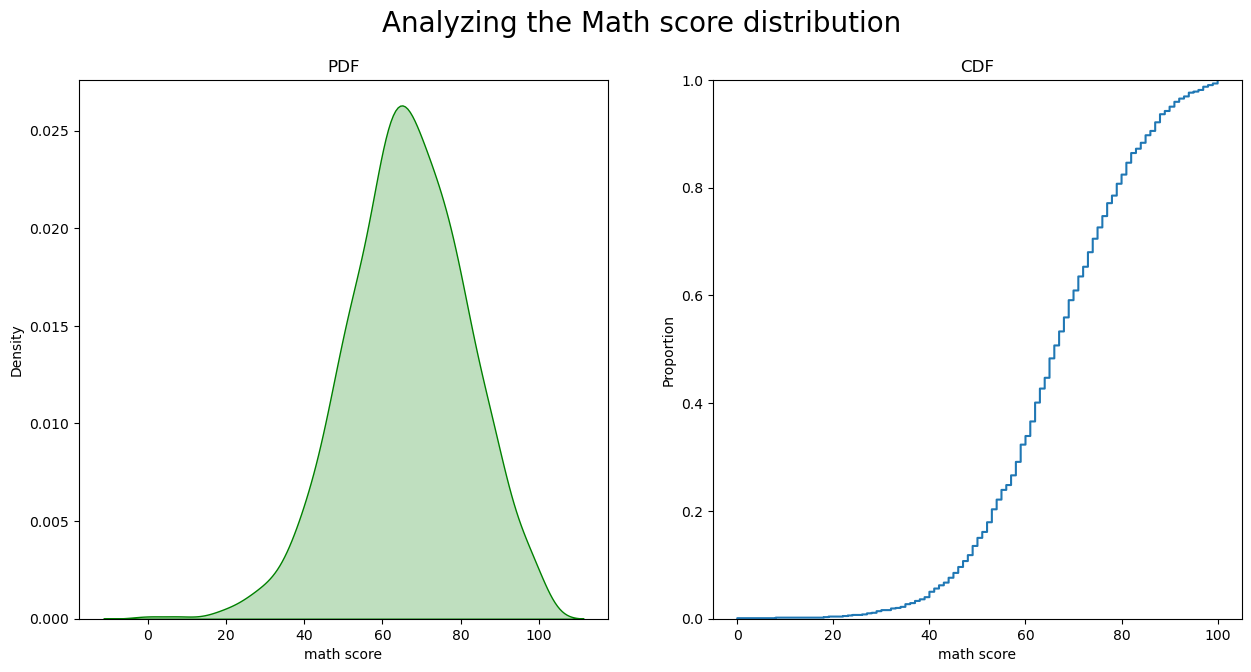

In [15]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))
fig.suptitle("Analyzing the Math score distribution",fontsize=20)
sns.kdeplot(data = df,x="math score",ax=ax1,fill=True,color='green')
ax1.title.set_text("PDF")
sns.ecdfplot(data = df,x="math score",ax=ax2)
ax2.title.set_text("CDF")

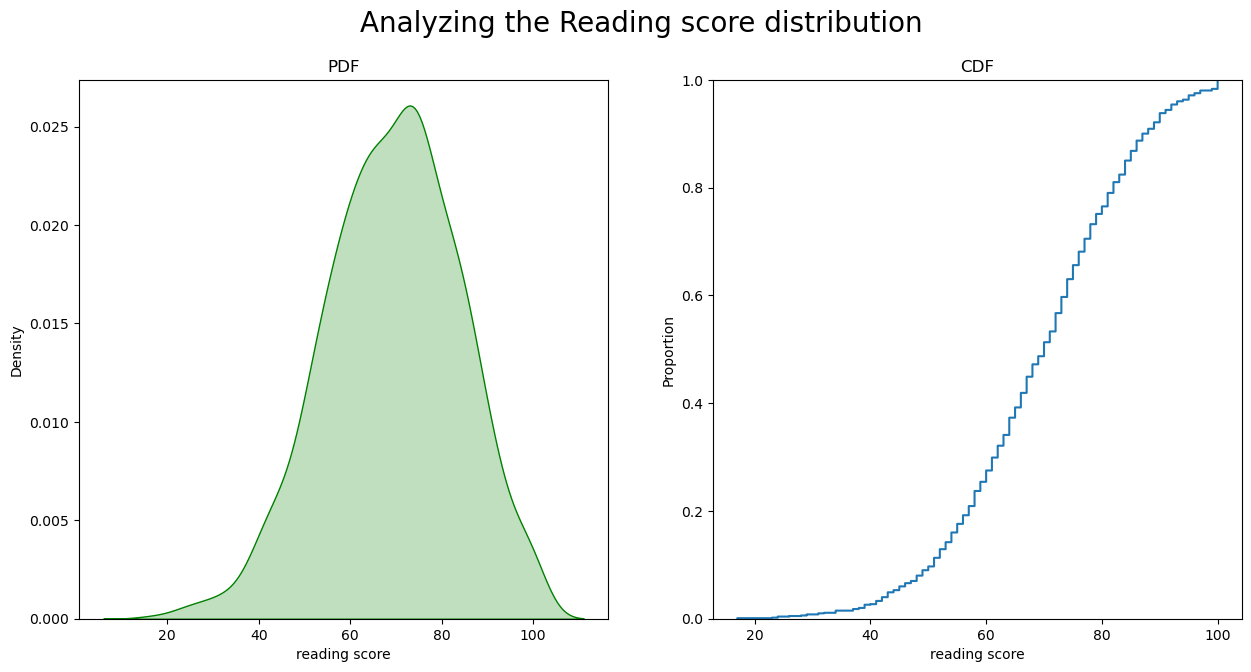

In [16]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))
fig.suptitle("Analyzing the Reading score distribution",fontsize=20)
sns.kdeplot(data = df,x= "reading score",ax=ax1,fill=True,color='green')
ax1.title.set_text("PDF")
sns.ecdfplot(data = df,x="reading score",ax=ax2)
ax2.title.set_text("CDF")

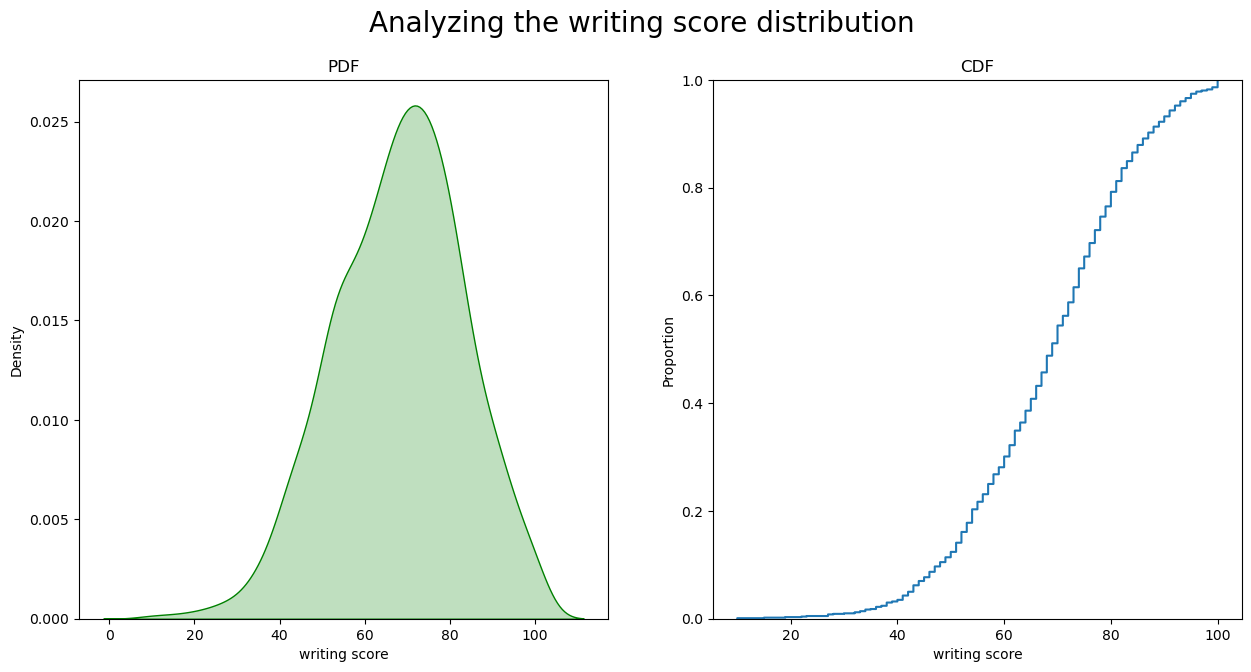

In [17]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))
fig.suptitle("Analyzing the writing score distribution",fontsize=20)
sns.kdeplot(data = df,x="writing score",ax=ax1,fill=True,color='green')
ax1.title.set_text("PDF")
sns.ecdfplot(data = df,x="writing score",ax=ax2)
ax2.title.set_text("CDF")

#  Insights 

- The PDF distribution of all three shows they are left/negatively skewed.
- The average scores for writing, reading, and math are around 65 to 70.
- Most of the students have scored above 40 marks.
- The scores for writing and reading have less variation than the scores for math, which have more outliers.



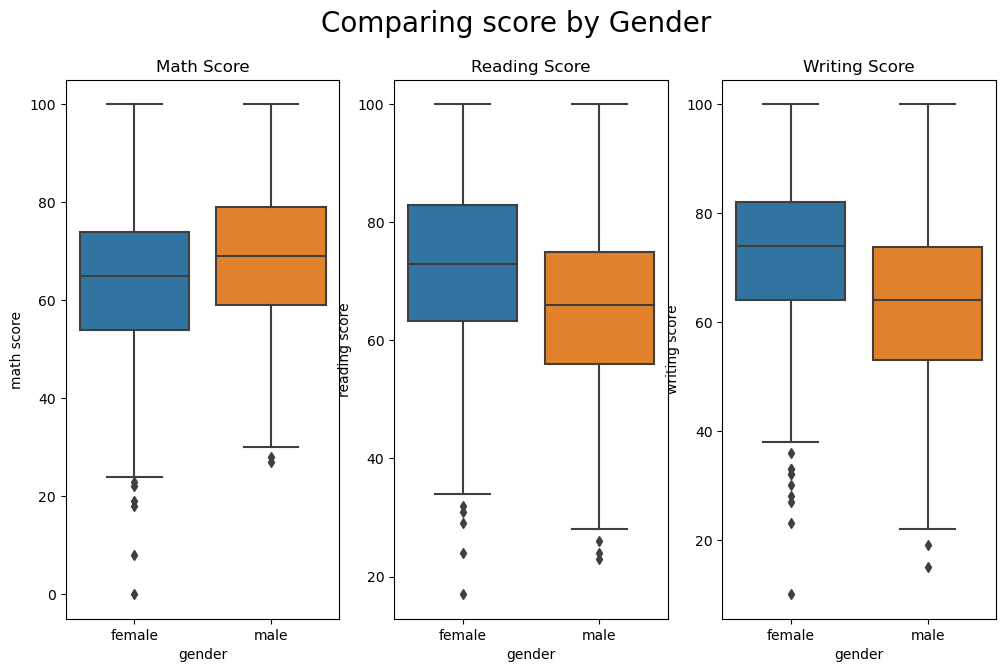

In [18]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,7))
fig.suptitle("Comparing score by Gender",fontsize=20)
sns.boxplot(data = df,x='gender', y='math score',ax=ax1)
ax1.title.set_text("Math Score")
sns.boxplot(data = df,x='gender',y="reading score",ax=ax2)
ax2.title.set_text("Reading Score")
sns.boxplot(data = df,x='gender',y="writing score",ax=ax3)
ax3.title.set_text("Writing Score")

# Insights

- Female students have performed better in reading and writing exam than males.
- In Maths , Male students have done better than females.Also, the lowest marks that is 0 in math is scored by a Female student.


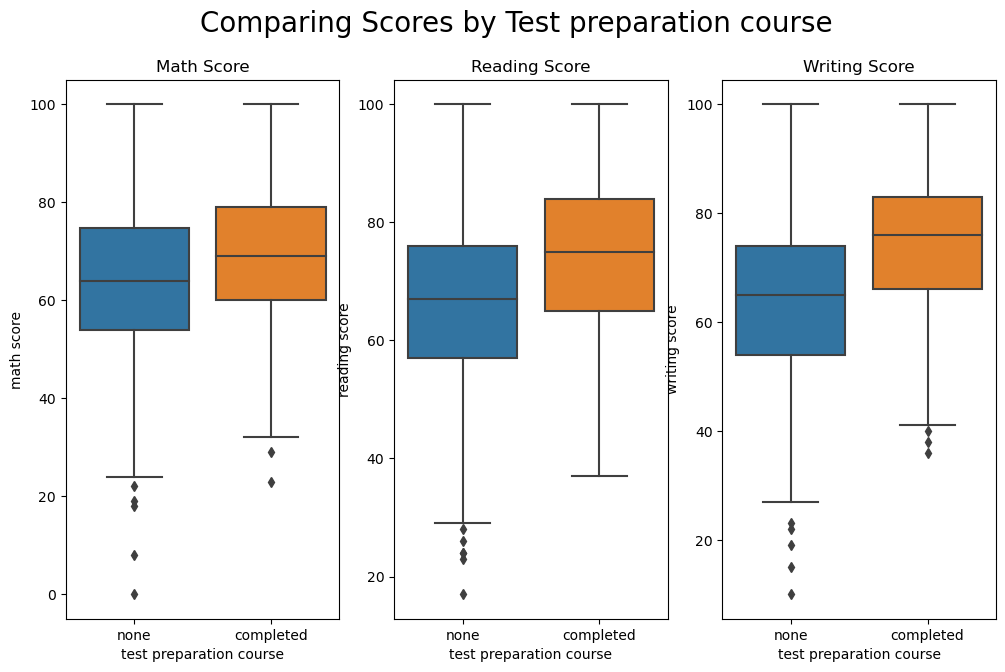

In [19]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,7))
fig.suptitle("Comparing Scores by Test preparation course",fontsize=20)
sns.boxplot(data = df,x='test preparation course', y='math score',ax=ax1)
ax1.title.set_text("Math Score")
sns.boxplot(data = df,x='test preparation course',y="reading score",ax=ax2)
ax2.title.set_text("Reading Score")
sns.boxplot(data = df,x='test preparation course',y="writing score",ax=ax3)
ax3.title.set_text("Writing Score")

# Insights

- Students who completed their test preparation course did better than those who did not.
- The students who did not complete the course are the ones who scored zero and the lowest marks.

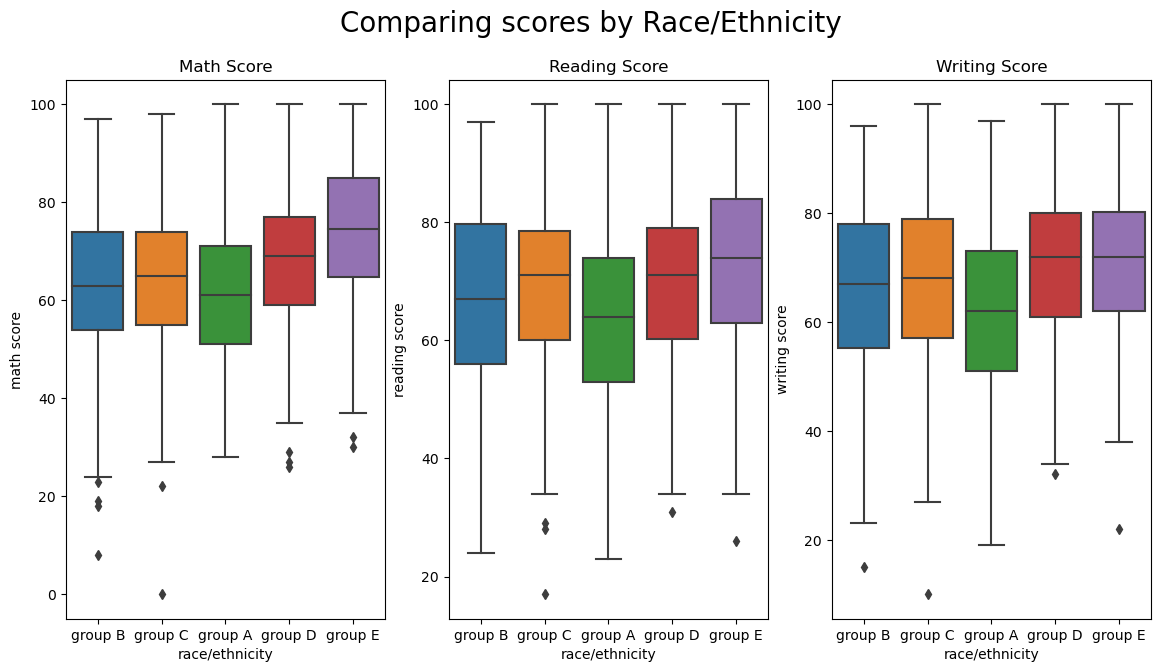

In [20]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,7))
fig.suptitle("Comparing scores by Race/Ethnicity",fontsize=20)
sns.boxplot(data = df,x='race/ethnicity', y='math score',ax=ax1)
ax1.title.set_text("Math Score")
sns.boxplot(data = df,x='race/ethnicity',y="reading score",ax=ax2)
ax2.title.set_text("Reading Score")
sns.boxplot(data = df,x='race/ethnicity',y="writing score",ax=ax3)
ax3.title.set_text("Writing Score")

# Insights

- The median math score for group E is higher than any other group, followed by group D, group C, group B, and group A. This suggests that group E has the highest average math score among all groups.

- The students who have scored least marks is from group C.

- Among all the groups, Group E has performed the best and Group A has performed the worst.



In [21]:
## calculate total score and average marks for better understanding 
df['total_score'] = df['math score']+df['reading score']+df['writing score']
df["average"] = df['total_score']/3

<Axes: xlabel='average', ylabel='Count'>

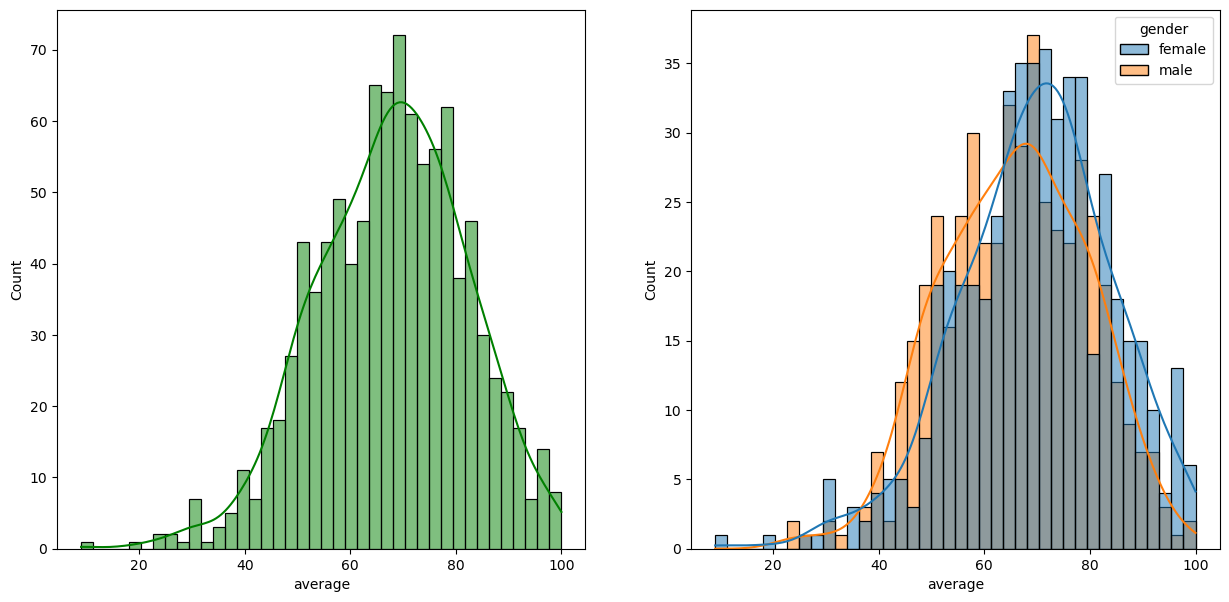

In [22]:
## more visualization 
fig,ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(x='average',data = df,kde=True,bins=40,color ="green")
plt.subplot(122)
sns.histplot(x = df['average'],kde = True,bins=40,hue=df['gender'])


# Insights
Compared to male students,Female students typically perform well.

<Axes: xlabel='average', ylabel='Count'>

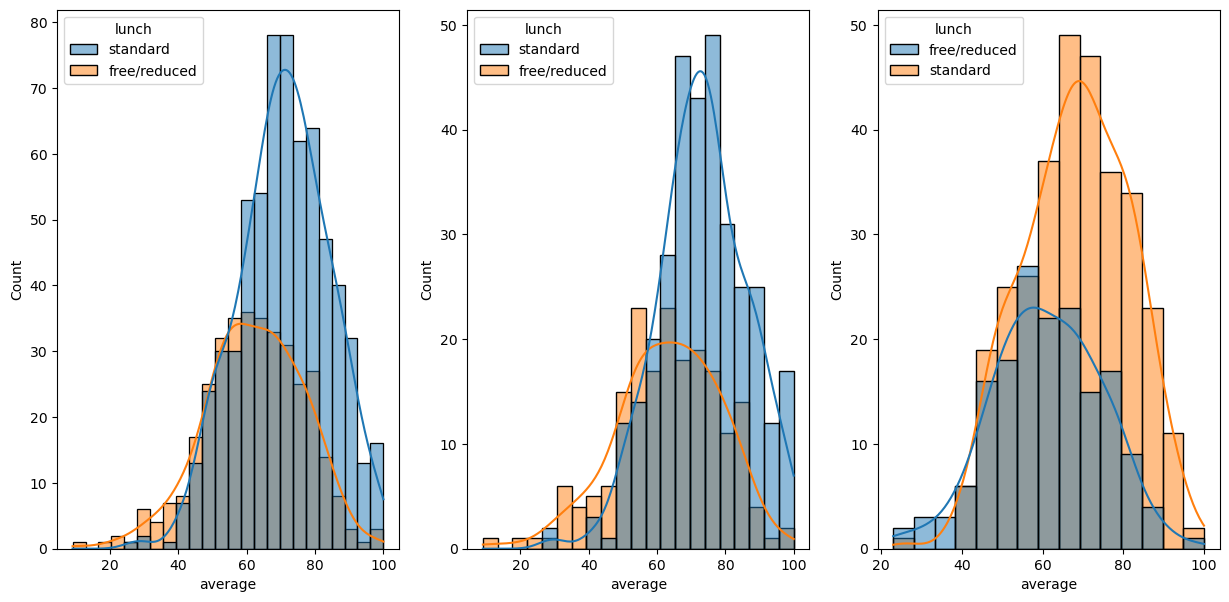

In [23]:
fig,ax = plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')


# Insights

Standard lunch helps students to perform well in exams be it a male or female.


<Axes: xlabel='average', ylabel='Count'>

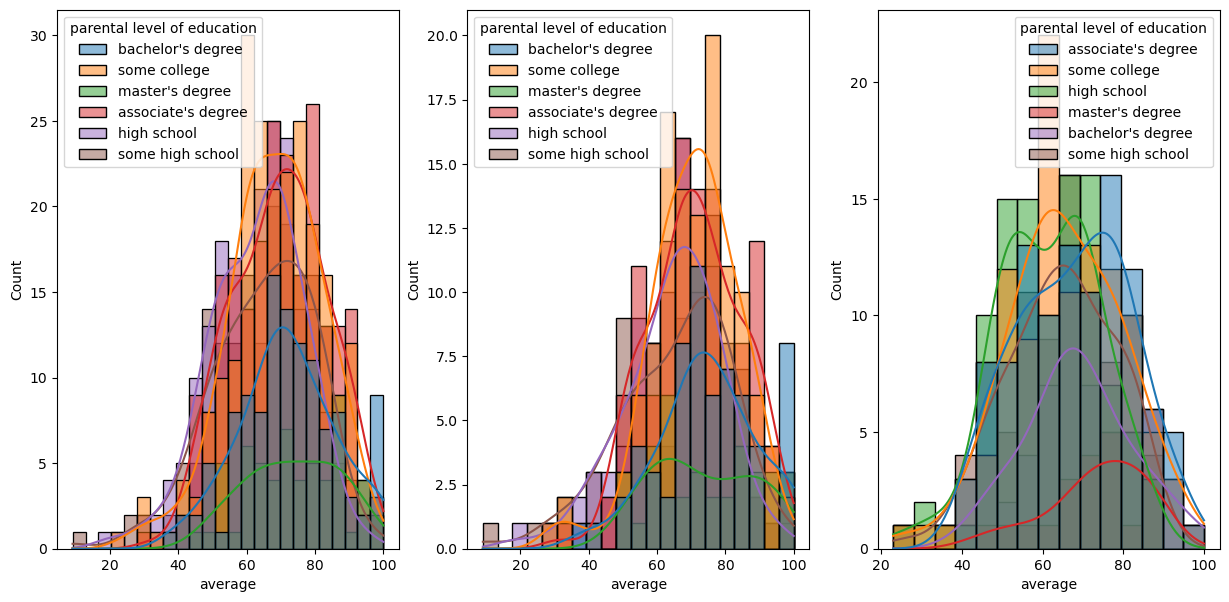

In [24]:
fig,ax = plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')


#  Insights
- In general, parental education does not aid a student's exam performance.
- From the second plot, it is clear that female students are not affected by their parents' education.
- The third plot demonstrates that fathers with associate's or master's degrees tend to have sons who do well on exams.

In [25]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score', 'average'],
      dtype='object')

<Axes: xlabel='math score', ylabel='writing score'>

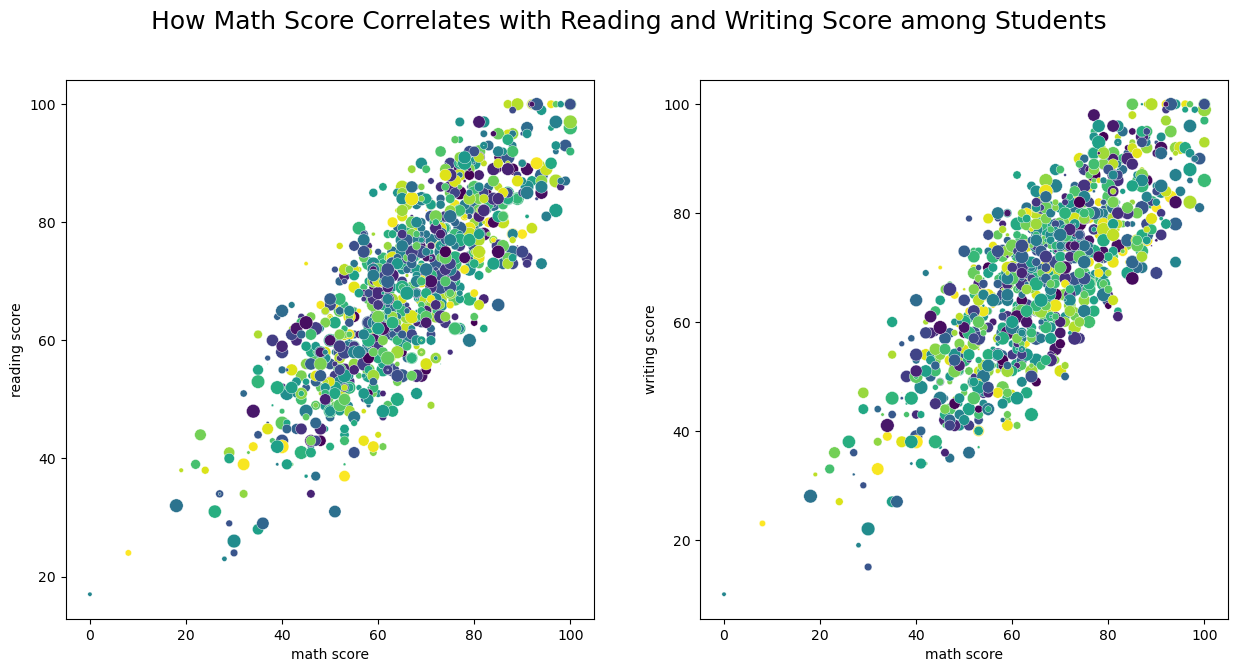

In [26]:
## scatterplots to analyse the correlation 
fig,ax = plt.subplots(1,2,figsize=(15,7))
fig.suptitle("How Math Score Correlates with Reading and Writing Score among Students",fontsize = 18)
s = 100* np.random.rand(1000)
c=  np.random.rand(1000)
plt.subplot(121)
sns.scatterplot(data = df,x='math score',y='reading score',s=s,c=c)
plt.subplot(122)
sns.scatterplot(data = df,x='math score',y='writing score',s=s,c=c)

# Insights 

- Students who have high score in Math tend to have high score Reading and Writing score as well.

<Axes: >

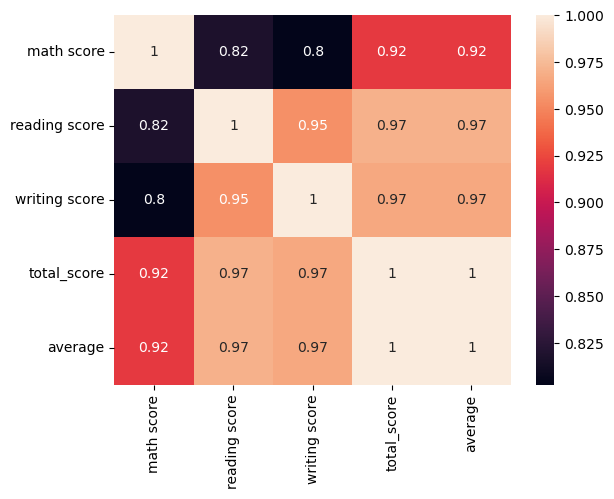

In [27]:
## Also we can see the correlation using heatmap
sns.heatmap(df.corr(),annot = True)

<font size='7' color="#008080" face="Times New Roman"> Final Conclusion </font>



    
- There is a significant difference between the average scores of different race/ethnicity groups, with group E having the highest average score and group A having the lowest average score. However, this difference may not reflect the true ability of the students, as there may be other factors that affect their performance, such as socio-economic status, cultural background, or educational opportunities.
    
    

- There is a gender gap in reading and writing scores, with females having higher average scores than males. However, there is no significant difference between the median scores of males and females. This suggests that there is no difference between the central tendency of the scores for males and females.


- There is no significant difference between the average scores of different parental education levels, except for some cases where fathers with associate’s or master’s degrees tend to have sons who do well on exams.So we can say parental education does not have much impact on students education.

    
- This means that the scores for writing and reading are more consistent and predictable than the scores for math, which have more extreme values.

   
    

-  Students who completed their test preparation course did better than those who did not.



